In [10]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
NUM_CLASSES = 6
CLASSES = ["sadnesss", "joy", "love", "anger", "fear"]
WEIGHTS = torch.tensor([0.00287505, 0.00246512, 0.01015641, 0.00615233, 0.00702346, 0.02318034])

In [12]:
# Load all data
train_data = pd.read_csv("data/training.csv")
test_data = pd.read_csv("data/test.csv")
validation_data = pd.read_csv("data/validation.csv")

# Separate X's and y's from each other
FEATURE_COLUMNS = ["text"]
LABEL_COLUMN = "label"

X_train = train_data[FEATURE_COLUMNS]
Y_train = train_data[LABEL_COLUMN]

X_test = test_data[FEATURE_COLUMNS]
Y_test = test_data[LABEL_COLUMN]

X_val = validation_data[FEATURE_COLUMNS]
Y_val = validation_data[LABEL_COLUMN]

# These are used to run cross validation
X_train_val = pd.concat([X_train, X_val]) 
Y_train_val = pd.concat([Y_train, Y_test])

# These are used to run val and test for Neural Nets
X_val_test = pd.concat([X_val, X_test])
Y_val_test = pd.concat([Y_val, Y_test])

In [13]:
X_train_maxtoks = X_train['text'].str.len().max()
X_test_maxtoks = X_test['text'].str.len().max()
X_val_maxtoks = X_val['text'].str.len().max() 

max_toks = max(X_train_maxtoks, X_test_maxtoks, X_val_maxtoks)
print(max_toks)

300


# Data Loaders

In [18]:
# Pytorch specific constants
from torch.utils.data import TensorDataset, DataLoader
from extractors.chartok import  CharTokenDataset
from utils.neuralnet import NeuralNetwork
from utils.rnn import LSTMNetwork
from utils.transformer import TransformerEncoder
from utils.trainer import training_loop, evaluate
import torch

BATCH_SIZE = 32
LEARNING_RATE = 1e-4
EPOCHS = 1000

# Standard 1 Layer Perceptron

In [26]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [28]:
mlp = NeuralNetwork(max_toks, [], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/slpseq")

Epoch 1
train_loss = 1.6305, val_loss = 1.5981
Epoch 2
train_loss = 1.5535, val_loss = 1.5897
Epoch 3
train_loss = 1.5929, val_loss = 1.5881
Epoch 4
train_loss = 1.5794, val_loss = 1.5881
Epoch 5
train_loss = 1.6251, val_loss = 1.5856
Epoch 6
train_loss = 1.6979, val_loss = 1.5872
Epoch 7
train_loss = 1.6327, val_loss = 1.5846
Epoch 8
train_loss = 1.6851, val_loss = 1.5844
Epoch 9
train_loss = 1.3775, val_loss = 1.5872
Epoch 10
train_loss = 1.6131, val_loss = 1.5848
Epoch 11
train_loss = 1.5301, val_loss = 1.5839
Epoch 12
train_loss = 1.7645, val_loss = 1.5849
Epoch 13
train_loss = 1.6301, val_loss = 1.5861
Epoch 14
train_loss = 1.6156, val_loss = 1.5813
Epoch 15
train_loss = 1.6055, val_loss = 1.5838
Epoch 16
train_loss = 1.5228, val_loss = 1.5826
Epoch 17
train_loss = 1.4129, val_loss = 1.5823
Epoch 18
train_loss = 1.3239, val_loss = 1.5819
Epoch 19
train_loss = 1.6793, val_loss = 1.5851
Epoch 20
train_loss = 1.5410, val_loss = 1.5822
Epoch 21
train_loss = 1.5494, val_loss = 1.5834
E

loss = 1.5727
accuracy = 0.3360
f1 = 0.2642
[[0.31420765 0.27804878 0.5        0.1        0.3        0.        ]
 [0.32923497 0.35528455 0.375      0.45       0.5        0.        ]
 [0.07103825 0.08617886 0.         0.05       0.         0.        ]
 [0.13797814 0.13821138 0.         0.2        0.         0.        ]
 [0.12431694 0.10487805 0.         0.15       0.1        0.        ]
 [0.02322404 0.03739837 0.125      0.05       0.1        0.        ]]


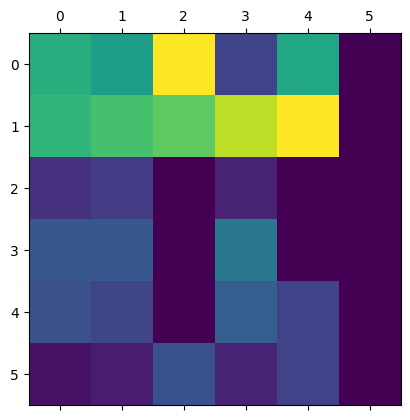

In [29]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# Standard MLP

In [30]:
# Because an MLP operates on fixed size inputs, we will use the entire fixed size input for this
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val, Y_val, tokenizer=None, max_seq_length=max_toks)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_test, Y_test, tokenizer=None, max_seq_length=max_toks)
test_loader = DataLoader(test_data, batch_size=1, shuffle=True)

In [31]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, path="models/mlpseq")

Epoch 1
train_loss = 1.6436, val_loss = 1.5911
Epoch 2
train_loss = 1.6620, val_loss = 1.5874
Epoch 3
train_loss = 1.5320, val_loss = 1.5837
Epoch 4
train_loss = 1.5878, val_loss = 1.5830
Epoch 5
train_loss = 1.6648, val_loss = 1.5817
Epoch 6
train_loss = 1.5469, val_loss = 1.5826
Epoch 7
train_loss = 1.6464, val_loss = 1.5851
Epoch 8
train_loss = 1.5953, val_loss = 1.5827
Epoch 9
train_loss = 1.5365, val_loss = 1.5824
Epoch 10
train_loss = 1.4230, val_loss = 1.5815
Epoch 11
train_loss = 1.7528, val_loss = 1.5817
Epoch 12
train_loss = 1.4775, val_loss = 1.5821
Epoch 13
train_loss = 1.6512, val_loss = 1.5795
Epoch 14
train_loss = 1.4384, val_loss = 1.5818
Epoch 15
train_loss = 1.3520, val_loss = 1.5801
Epoch 16
train_loss = 1.5861, val_loss = 1.5812
Epoch 17
train_loss = 1.7807, val_loss = 1.5780
Epoch 18
train_loss = 1.5014, val_loss = 1.5826
Epoch 19
train_loss = 1.6369, val_loss = 1.5818
Epoch 20
train_loss = 1.5468, val_loss = 1.5800
Epoch 21
train_loss = 1.7030, val_loss = 1.5801
E

KeyboardInterrupt: 

loss = 2.7119
accuracy = 0.2985
f1 = 0.2465
[[0.29435484 0.29528986 0.18518519 0.29411765 0.22222222 0.        ]
 [0.34811828 0.33333333 0.51851852 0.39215686 0.44444444 1.        ]
 [0.07258065 0.08242754 0.07407407 0.07843137 0.11111111 0.        ]
 [0.13306452 0.14130435 0.07407407 0.11764706 0.16666667 0.        ]
 [0.11827957 0.11231884 0.14814815 0.11764706 0.02777778 0.        ]
 [0.03360215 0.03532609 0.         0.         0.02777778 0.        ]]


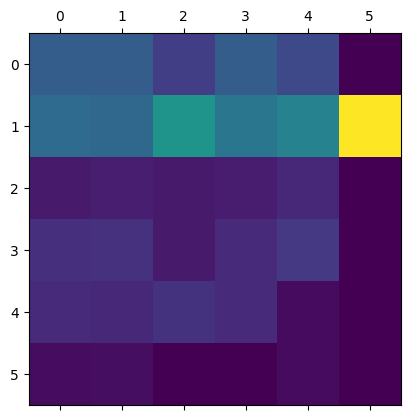

In [32]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# MLP with Weighting

In [34]:
mlp = NeuralNetwork(max_toks, [100, 100, 100], NUM_CLASSES, device="cuda")
training_loop(mlp, train_loader, val_loader, epochs=100, learning_rate=LEARNING_RATE, path="models/mlpseqwt", weights=WEIGHTS)

Epoch 1
train_loss = 1.7850, val_loss = 1.7939
Epoch 2
train_loss = 1.7895, val_loss = 1.7936
Epoch 3
train_loss = 1.7976, val_loss = 1.7938
Epoch 4
train_loss = 1.7926, val_loss = 1.7942
Epoch 5
train_loss = 1.8025, val_loss = 1.7928
Epoch 6
train_loss = 1.7846, val_loss = 1.7930
Epoch 7
train_loss = 1.8086, val_loss = 1.7927
Epoch 8
train_loss = 1.8105, val_loss = 1.7931
Epoch 9
train_loss = 1.8044, val_loss = 1.7923
Epoch 10
train_loss = 1.7838, val_loss = 1.7926
Epoch 11
train_loss = 1.8128, val_loss = 1.7923
Epoch 12
train_loss = 1.7866, val_loss = 1.7930
Epoch 13
train_loss = 1.7930, val_loss = 1.7922
Epoch 14
train_loss = 1.7765, val_loss = 1.7918
Epoch 15
train_loss = 1.8198, val_loss = 1.7924
Epoch 16
train_loss = 1.7860, val_loss = 1.7924
Epoch 17
train_loss = 1.8214, val_loss = 1.7922
Epoch 18
train_loss = 1.7827, val_loss = 1.7911
Epoch 19
train_loss = 1.7696, val_loss = 1.7917
Epoch 20
train_loss = 1.8039, val_loss = 1.7918
Epoch 21
train_loss = 1.7765, val_loss = 1.7914
E

loss = 1.9826
accuracy = 0.1965
f1 = 0.2075
[[0.25952813 0.29497908 0.27586207 0.31355932 0.32702703 0.28846154]
 [0.35934664 0.33263598 0.40229885 0.3220339  0.33243243 0.32692308]
 [0.08348457 0.07740586 0.06896552 0.0720339  0.07297297 0.13461538]
 [0.14337568 0.14435146 0.11877395 0.1440678  0.13513514 0.11538462]
 [0.12522686 0.11297071 0.09961686 0.11864407 0.0972973  0.10576923]
 [0.02903811 0.0376569  0.03448276 0.02966102 0.03513514 0.02884615]]


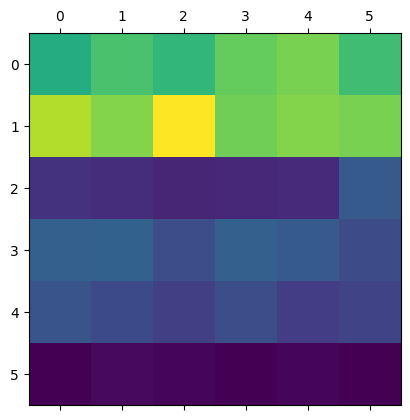

In [35]:
_, _, _, cmat = evaluate(model=mlp, val_dl=test_loader)
print(cmat)
plt.matshow(cmat)
plt.show()

# RNN

In [77]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val_test, Y_val_test, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_val_test, Y_val_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(val_data, batch_size=1, shuffle=True)


In [78]:
lstm = LSTMNetwork(32,  20, 10, NUM_CLASSES)
training_loop(lstm, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, weights = WEIGHTS)
torch.save(lstm.state_dict(), "models/lstmseq")

Epoch 1
train_loss = 1.4301, val_loss = 1.5713
Epoch 2
train_loss = 1.4963, val_loss = 1.5724
Epoch 3
train_loss = 1.6407, val_loss = 1.5704
Epoch 4
train_loss = 1.5011, val_loss = 1.5718
Epoch 5
train_loss = 1.7186, val_loss = 1.5694
Epoch 6
train_loss = 1.8273, val_loss = 1.5701
Epoch 7
train_loss = 1.6810, val_loss = 1.5712
Epoch 8
train_loss = 1.5338, val_loss = 1.5707
Epoch 9
train_loss = 1.6634, val_loss = 1.5712
Epoch 10
train_loss = 1.8470, val_loss = 1.5702
Epoch 11
train_loss = 1.5519, val_loss = 1.5704
Epoch 12
train_loss = 1.4881, val_loss = 1.5711
Epoch 13
train_loss = 1.8763, val_loss = 1.5697
Epoch 14
train_loss = 1.5481, val_loss = 1.5695
Epoch 15
train_loss = 1.5107, val_loss = 1.5700
Epoch 16
train_loss = 1.5635, val_loss = 1.5716
Epoch 17
train_loss = 1.5457, val_loss = 1.5702
Epoch 18
train_loss = 1.6173, val_loss = 1.5705
Epoch 19
train_loss = 1.7106, val_loss = 1.5705
Epoch 20
train_loss = 1.5436, val_loss = 1.5704
Epoch 21
train_loss = 1.6580, val_loss = 1.5702
E

In [79]:
evaluate(model=lstm, val_dl=test_loader)

loss = 1.5700
accuracy = 0.3498
f1 = 0.1813


(tensor(1.5700), 0.34975, 0.18125588071865162)

# Transformer

In [99]:
train_data = CharTokenDataset(X_train, Y_train, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

val_data = CharTokenDataset(X_val_test, Y_val_test, tokenizer=None, max_seq_length=max_toks, dtype = torch.int32)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)

# Batch size is hard coded to 1 for accuracy purposes. 
test_data = CharTokenDataset(X_val_test, Y_val_test, tokenizer=None, max_seq_length=max_toks, dtype=torch.int32)
test_loader = DataLoader(val_data, batch_size=1, shuffle=True)


In [102]:
transformer = TransformerEncoder(max_toks, NUM_CLASSES, 10, 5, 4, ff=10, dropout=0.1)
training_loop(transformer, train_loader, val_loader, epochs=EPOCHS, learning_rate=LEARNING_RATE, weights = WEIGHTS)
torch.save(transformer.state_dict(), "models/xformerseq")

NameError: name 'WEIGHTS' is not defined

In [83]:
evaluate(model=transformer, val_dl=test_loader)

loss = 1.5704
accuracy = 0.3498
f1 = 0.1813


(tensor(1.5704), 0.34975, 0.18125588071865162)